In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Checkerboard Problem

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


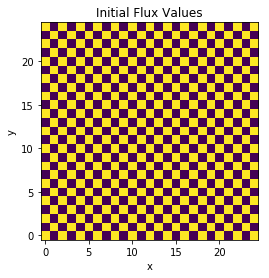

In [13]:
#Consider some non-sensical system where our flux oscillates at a high spacial frequency independent of time.

#Set up our grid
N = 29
time_steps = 7

x = np.linspace(0,N,N, dtype='int')
y = np.linspace(0,N,N, dtype='int')
xx, yy = np.meshgrid(x, y)

j = np.zeros((time_steps,N,N))

for t in range(time_steps):
    for m in range(N):
        for n in range(N):
            j[t,m,n] = (95/2) * np.exp(1j*np.pi*(xx[m,n] + yy[m,n] + t/2)) + (105/2)
        
plt.imshow(j[0,2:-2, 2:-2], origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Flux Values')


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


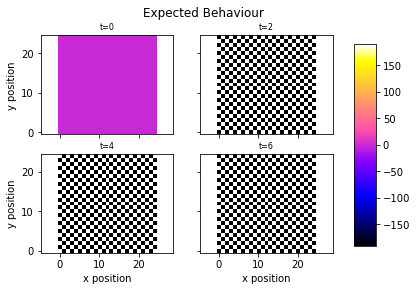

In [14]:
#Now to test our finite differences on the co-local grid

p_expected = np.zeros((time_steps, N,N))
p_actual   = np.zeros_like(p_expected)

#p_expected[0,:,:] = 300*np.random.random((N,N))
#p_actual[0,:,:]   = p_expected[0,:,:]

for t in range(1, time_steps):
    for m in range(N):
        for n in range(N):
            p_expected[t,m,n] = 190*np.exp(1j*np.pi*(xx[m,n] + yy[m,n] + t/2))
            if ((m > 0) and (m < N-1) and (n >0) and (n < N-1)):
                p_actual[t,m,n] = (-j[t,m+1,n] + j[t,m-1,n] - j[t,m,n+1] + j[t,m,n-1] + p_actual[t-1,m,n])
               
#Now we need to get the bounds of the possible p values to keep our colorbar constant

v_min = np.amin(p_expected)
v_max = np.amax(p_expected)

fig, ax = plt.subplots(2,2,num=1, sharex=True, sharey=True)
ax[0,0].imshow(p_expected[0,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[0,0].set_ylabel('y position')
ax[0,1].imshow(p_expected[2,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,0].imshow(p_expected[4,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,0].set_ylabel('y position')
ax[1,0].set_xlabel('x position')
im = ax[1,1].imshow(p_expected[6,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,1].set_xlabel('x position')
ax[0,0].set_title('t=0', fontsize=8)
ax[0,1].set_title('t=2', fontsize=8)
ax[1,0].set_title('t=4', fontsize=8)
ax[1,1].set_title('t=6', fontsize=8)
fig.suptitle('Expected Behaviour')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('expected_checkerboard', dpi=200)

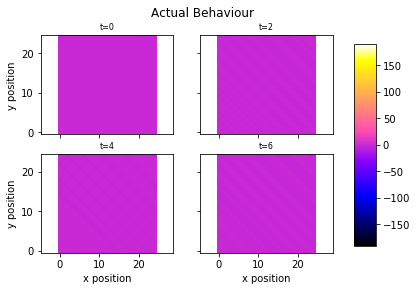

In [15]:
fig, ax = plt.subplots(2,2,num=2, sharex=True, sharey=True)
ax[0,0].imshow(p_actual[0,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[0,0].set_ylabel('y position')
ax[0,1].imshow(p_actual[2,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,0].imshow(p_actual[4,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,0].set_ylabel('y position')
ax[1,0].set_xlabel('x position')
im = ax[1,1].imshow(p_actual[6,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,1].set_xlabel('x position')
fig.suptitle('Actual Behaviour')
ax[0,0].set_title('t=0', fontsize=8)
ax[0,1].set_title('t=2', fontsize=8)
ax[1,0].set_title('t=4', fontsize=8)
ax[1,1].set_title('t=6', fontsize=8)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('actual_checkerboard', dpi=200)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


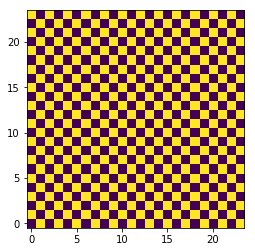

In [16]:
#Now let's examine the same behaviour with staggered grids.
#Let's keep our previous x and y grids, and instead make the j grid in between

j = np.zeros((time_steps,N-1,N-1), dtype='int')

for t in range(time_steps):
    for m in range(N-1):
        for n in range(N-1):
            j[t,m,n] = (95/2)*np.exp(1j*np.pi*(xx[m,n] + yy[m,n] + 1 + t/2)) + (105/2)
            
plt.imshow(j[0,2:-2, 2:-2], origin='lower')

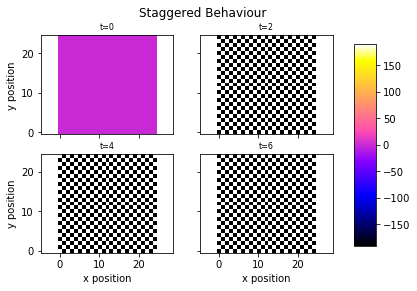

In [17]:
p_stag = np.zeros((time_steps, N,N))
p_stag[0,:,:] = p_expected[0,:,:]

for t in range(1, time_steps):
    for m in range(N):
        for n in range(N):
            if ((m > 0) and (m < N-1) and (n> 0) and (n < N-1)):
                p_stag[t,m,n] = (-j[t,m,n] + j[t,m-1,n] - j[t,m,n] + j[t,m,n-1] + p_actual[t-1,m,n])
    p_stag[t,:2,:] = p_expected[0,:2,:]
    p_stag[t,-2:,:] = p_expected[0,-2:,:]
    p_stag[t,:,:2] = p_expected[0,:,:2]
    p_stag[t,:,-2:] = p_expected[0,:,-2:]
                
fig, ax = plt.subplots(2,2,num=2, sharex=True, sharey=True)
ax[0,0].imshow(p_stag[0,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[0,0].set_ylabel('y position')
ax[0,1].imshow(p_stag[2,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,0].imshow(p_stag[4,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,0].set_ylabel('y position')
ax[1,0].set_xlabel('x position')
im = ax[1,1].imshow(p_stag[6,2:-2,2:-2], origin='lower', vmin=v_min, vmax=v_max, cmap='gnuplot2')
ax[1,1].set_xlabel('x position')
fig.suptitle('Staggered Behaviour')
ax[0,0].set_title('t=0', fontsize=8)
ax[0,1].set_title('t=2', fontsize=8)
ax[1,0].set_title('t=4', fontsize=8)
ax[1,1].set_title('t=6', fontsize=8)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('staggered_checkerboard', dpi=200)